In [ ]:
!pip install mglearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

import mglearn

## SVM(Support Vector Machine)

- svm.pdf

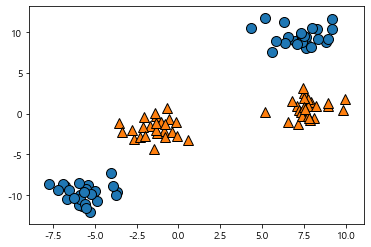

In [2]:
from sklearn.datasets import make_blobs

# make_blobs() : n개의 무작위 클러스터(centers) 생성
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


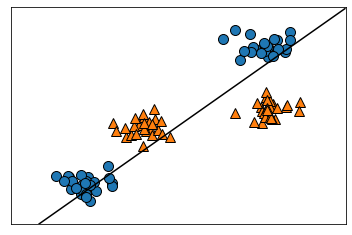

In [3]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

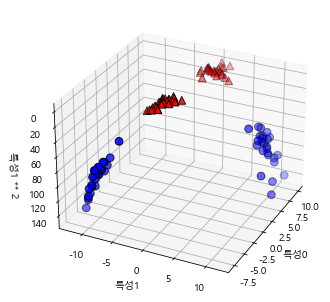

In [4]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

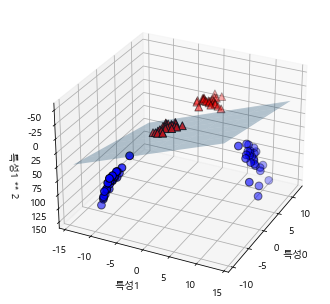

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

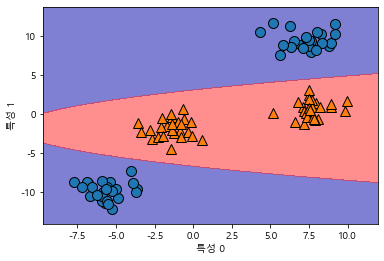

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 파라미터 : cost, gamma

+ cost(C)
    - decision boundary와 마진의 간격을 어느 정도로 할지를 결정
    - cost가 작으면 마진은 넓어진다.
    - SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있다=일반화가 잘 된다
    
+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 적으면 영향을 끼치는 범위가 넓어진다.

In [11]:
from sklearn.svm import SVC

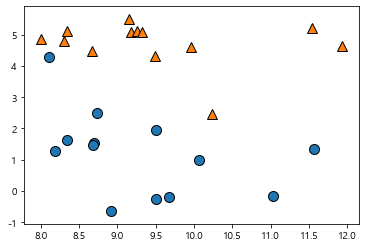

In [12]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### 커널 트릭
- 어떠한 특성도 새로 추가하지 않으면서 특성을 추가한 것과 수학적으로 동일한 결과가 나오게 하는 기법
    + 다항 커널: 다항 특성을 추가하는 효과를 내주는 함수
    + 가우시안 RBF 커널: 유사도 특성을 추가하는 효과를 내주는 함수

#### 가우시안 RBF 커널

- 핸즈온 p213
- 유사도 특성: 비선형 특성을 다루는 또 다른 기법
    - 각 샘플이 특정 landmark와 얼마나 닮았는지를 측정하는 함수


- 가우시안 RBF(Radial Basis Function, 방사 기저 함수)
    - 아래 그림과 같이 이 함수의 값은 0(랜드마크로부터 멀리 떨어짐)부터 1(랜드마크와 같은 위치)까지 변화하며 종모양으로 나타난다
    
    
- Radial Basis Function의 기본 아이디어는 데이터 집합의 모든 점이 가설에 영향을 준다는 것이다
    - 즉, 데이터 집합의 한 점이 근처에 있는 다른 점에 영향을 미친다
    - 출처 : https://keepmind.net/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-16-radial-basis-function/
![nn](data/rbf.jpg)

In [13]:
# 가우시안 RBF 커널
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

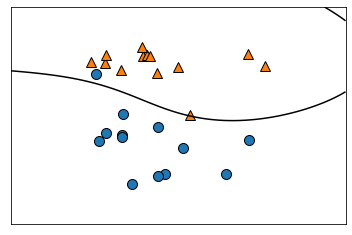

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [15]:
sv = svm.support_vectors_

Text(0, 0.5, '특성 1')

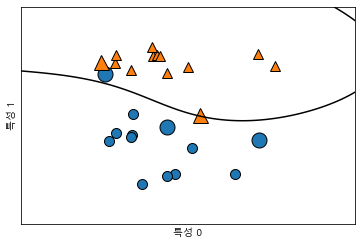

In [16]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

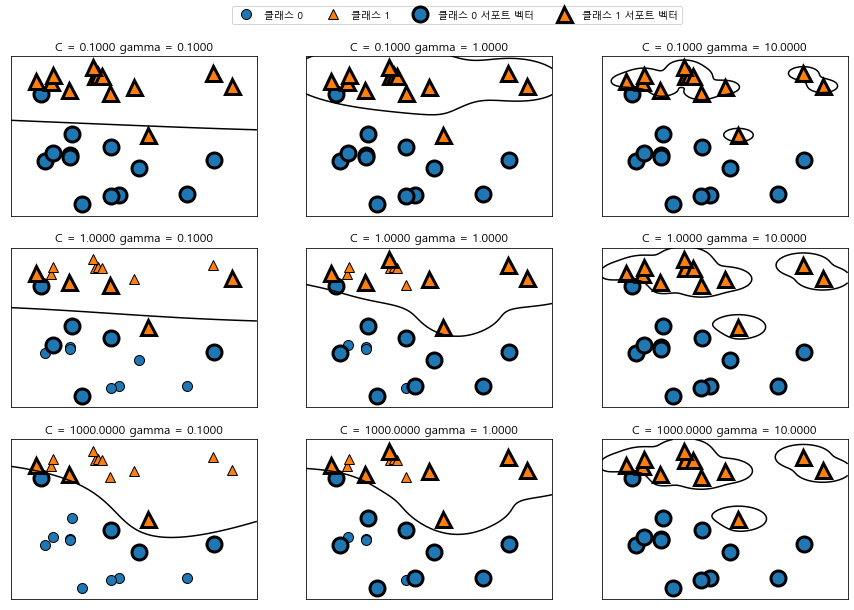

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

# gamma가 커질수록 실제 데이터에 가깝게 복잡한 모델이 된다. (직선->곡선)
# cost가 커질수록 support vector(실제 데이터)와 모델(수평선)의 margin이 줄어든다. (복잡한 모델)

### 유방암 데이터셋 활용

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [19]:
svm = SVC() # 기본값 : C=1, gamma=1/X_train.shape[1](특성의 개수)
svm.fit(X_train, y_train)

SVC()

In [20]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.903755868544601
테스트 결과 :  0.9370629370629371


In [21]:
########## 전처리로 스케일 조정 ##########

# 특성별 최소값
min_on_training = X_train.min(axis=0)
print(min_on_training)

# 특성별 최대값
max_on_training = X_train.max(axis=0)
print(max_on_training)

# 특성별 범위 (최대값 - 최소값)
#range_on_training = max_on_training - min_on_training
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]


In [22]:
svm2 = SVC().fit(X_train_scaled, y_train)

In [23]:
print("훈련 결과 : ", svm2.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm2.score(X_test_scaled, y_test))

훈련 결과 :  0.9835680751173709
테스트 결과 :  0.972027972027972


In [24]:
# Cost로 성능 튜닝
# C값이 커질수록 마진이 좁아진다 = 복잡한 모델

svm50 = SVC(C=50).fit(X_train_scaled, y_train)

In [25]:
print("훈련 결과 : ", svm50.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm50.score(X_test_scaled, y_test))

훈련 결과 :  0.9953051643192489
테스트 결과 :  0.9790209790209791


#### Cross Validation & Grid Search

- 핸즈온 p211, 115, 머신러닝개발입문 p218- 참고
- Cross Validation : 특정 데이터를 훈련 전용 데이터와 테스트 전용 데이터로 분할한 뒤, 훈련 데이터를 통해 학습하고, 테스트 데이터로 테스트해서 학습의 타당성을 검증하는 방법 


- Grid Search : 적절한 하이퍼파라미터를 찾기 위한 방법
    + sklearn의 GridSearchCV : 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하면, 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증(CrossValidation)을 사용해 평가함
    + 처음에는 그리드의 폭을 크게 하여 빠르게 검색하고, 그 다음에는 최적의 값을 찾기 위해 그리드를 세밀하게 검색함

In [26]:
# Grid Search
from sklearn.model_selection import GridSearchCV

params = [{"kernel":["rbf"], "gamma":[0.00001, 0.0001, 0.001, 0.1, 1],
          "C":[0.01, 0.1, 1, 10, 100, 1000]}]

gs_svm = GridSearchCV(SVC(), params, cv=10).fit(X_train_scaled, y_train) # cv=10 : 10개로 분할하여 교차 검증

In [27]:
print(gs_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [28]:
svm = SVC(C=1, gamma=1).fit(X_train_scaled, y_train)
print("훈련 결과 : ", svm.score(X_train_scaled, y_train))
print("테스트 결과 : ", svm.score(X_test_scaled, y_test))

훈련 결과 :  0.9835680751173709
테스트 결과 :  0.972027972027972


### 붓꽃 데이터 활용

In [29]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
#X = iris.data[:, [2, 3]]
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [34]:
X_train.shape[1]

4

In [35]:
svm = SVC().fit(X_train, y_train)

In [36]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.9714285714285714
테스트 결과 :  0.9777777777777777


In [37]:
svm = SVC(kernel='linear', C=1, gamma=1e-6).fit(X_train, y_train)

In [38]:
print("훈련 결과 : ", svm.score(X_train, y_train))
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.9809523809523809
테스트 결과 :  0.9777777777777777


### 농구 선수의 포지션 예측

- SG: Shooting Gard
- C: Center
- TRB: 리바운드
- BLK: Blocking

In [ ]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

In [ ]:
df.Pos.value_counts()

In [ ]:
############## 불필요한 특성을 구분하기 위한 시각화 ##############

# 스틸, 2점슛
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

In [ ]:
# 어시스트, 2점슛
sns.lmplot("AST", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

In [ ]:
# 리바운드, 3점슛
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

In [ ]:
# 불필요한 특성 제거
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
import pickle

In [ ]:
# 이진 파일로 저장(직렬화)
train_data = open("data/basketball_train.pkl", "wb")
pickle.dump(train, train_data)

test_data = open("data/basketball_test.pkl", "wb")
pickle.dump(test, test_data)

train_data.close()
test_data.close()

In [ ]:
# 파일 불러오기

with open('data/basketball_train.pkl', "rb") as train_data:
    train = pickle.load(train_data)
    
with open('data/basketball_test.pkl', "rb") as test_data:
    train = pickle.load(test_data)

In [ ]:
train.head()
test.head()

In [ ]:
# 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train = train[["3P","TRB", "BLK"]]
y_train = train["Pos"]

params = [{"kernel":["rbf", "linear"], 
         "gamma":[0.00001, 0.0001, 0.001, 0.1, 1],
         "C":[0.01, 0.1, 1, 10, 100, 1000]}]

svm = GridSearchCV(SVC(), params, cv=10).fit(X_train, y_train)

In [ ]:
print(svm.best_params_)

In [ ]:
# 테스트
X_test = test[["3P","TRB", "BLK"]]
y_test = test["Pos"]

pred = svm.predict(X_test)

In [ ]:
print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
df_compare = pd.DataFrame({"prediction":pred, "truth":y_test})
df_compare.head()

### 이미지 내부의 문자 인식

- 머신러닝개발입문 p181-

In [ ]:
# MNIST(손글씨 숫자) 데이터 다운로즈 및 압축 해제
import urllib.request as req
import gzip, os, os.path

savepath = "./data/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]

# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)

print("ok")

In [ ]:
# 이진(binary) 데이터를 CSV 파일로 변환
import struct

def to_csv(name, maxdata):
    
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) # >: struct 모듈로 리틀 엔디안 데이터를 읽어들이는 기호
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    
    for idx in range(lbl_count): # 이미지 개수만큼 반복해서 데이터를 읽어들임
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n" # P2: 이미지 형식, 28*28 pixel, 0~255: color
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label) # .pgm: 글자 파일로 이미지를 나타내는 형식
            
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
                
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000) # 10000개의 데이터로 학습시킴
to_csv("t10k", 500)

In [ ]:
"""
포터블 비트맵(Portable Bitmaps)
1. pgm : 한 화소(pixel)를 1byte로 표현
    - P2, P5
2. pbm : 한 화소(pixel)를 1bit로 표현
    - P1, P4
3. ppm : 한 화소(pixel)를 3byte(R, G, B)로 표현
    - P3, P6
"""

In [ ]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [ ]:
print(data["images"][7])
print(data["labels"][7])

In [ ]:
model = SVC().fit(data["images"], data["labels"])

In [ ]:
pred = model.predict(test["images"])

In [ ]:
print("정확도 : ", accuracy_score(test["labels"], pred))
print(classification_report(test["labels"], pred))

In [ ]:
pred1 = model.predict([test["images"][300]])
pred1

In [ ]:
test["labels"][399]

In [ ]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas"); //input_form의 canvas에 다가
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) { //마우스 왼쪽 눌렀을때
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else { //마우스 왼쪽 떼었을때
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    // 읽은 데이터를 주피터 노트북의 image 변수에 전달
    function set_value(){ 
        var result = ""
        
        for (var i = 0; i < 28*28; i++) // 여백은 0, 그림은 1
            result += pixels[i] + ","
            
        var kernel = IPython.notebook.kernel; 
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){ //input_form의 Clear 버튼 누르면 지워줌
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [ ]:
from IPython.display import HTML

# 입력창 만들기 + 마우스로 그리기
HTML(input_form + javascript)

In [ ]:
print(image)

In [ ]:
pred2 = model.predict([image])
pred2